In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, timedelta

In [105]:
bank_data = '/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/bank-additional-full.csv'

In [106]:
data = pd.read_csv(bank_data, sep = ';')

In [107]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [108]:
data.reset_index(inplace=True)

In [109]:
data.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: floa

In [111]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [112]:
euribor = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/LIBOR EUR.csv')
euribor = euribor[['Date','3M']]

In [113]:
euribor['Date'] = pd.to_datetime(euribor['Date'])
euribor['3M'] = euribor['3M'].astype(str)

In [114]:
euribor.drop_duplicates(subset ="3M", keep = 'first', inplace = True)

In [115]:
euribor['euribor3m'] = euribor['3M'].apply(lambda x: x[0:5])

In [116]:
euribor.head()

,Date,3M,euribor3m
0,2010-11-30,0.9675,0.967
2,2010-11-26,0.96875,0.968
5,2010-11-23,0.97375,0.973
6,2010-11-22,0.97625,0.976
7,2010-11-19,0.97875,0.978


In [117]:
euribor.sort_values(by='euribor3m', ascending=False)

,Date,3M,euribor3m
549,2008-08-10,5.39125,5.391
548,2008-09-10,5.38625,5.386
550,2008-07-10,5.37125,5.371
547,2008-10-10,5.36625,5.366
551,2008-06-10,5.3375,5.337
...,...,...,...
159,2010-04-20,0.5818800000000001,0.581
166,2010-09-04,0.58063,0.580
172,2010-03-30,0.58,0.58
171,2010-03-31,0.5775,0.577


In [118]:
euribor['euribor3m'] = euribor['euribor3m'].astype(float)

In [119]:
# data_splits = data[['index','euribor3m']]

In [120]:
# data_splits.info()

In [121]:
data2= pd.merge(data,euribor, on='euribor3m', how='left')

In [122]:
data2['3M'] = data2['3M'].astype(float)

In [123]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 49282
Data columns (total 24 columns):
index             49283 non-null int64
age               49283 non-null int64
job               49283 non-null object
marital           49283 non-null object
education         49283 non-null object
default           49283 non-null object
housing           49283 non-null object
loan              49283 non-null object
contact           49283 non-null object
month             49283 non-null object
day_of_week       49283 non-null object
duration          49283 non-null int64
campaign          49283 non-null int64
pdays             49283 non-null int64
previous          49283 non-null int64
poutcome          49283 non-null object
emp.var.rate      49283 non-null float64
cons.price.idx    49283 non-null float64
cons.conf.idx     49283 non-null float64
euribor3m         49283 non-null float64
nr.employed       49283 non-null float64
y                 49283 non-null object
Date        

In [124]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 49282
Data columns (total 24 columns):
index             49283 non-null int64
age               49283 non-null int64
job               49283 non-null object
marital           49283 non-null object
education         49283 non-null object
default           49283 non-null object
housing           49283 non-null object
loan              49283 non-null object
contact           49283 non-null object
month             49283 non-null object
day_of_week       49283 non-null object
duration          49283 non-null int64
campaign          49283 non-null int64
pdays             49283 non-null int64
previous          49283 non-null int64
poutcome          49283 non-null object
emp.var.rate      49283 non-null float64
cons.price.idx    49283 non-null float64
cons.conf.idx     49283 non-null float64
euribor3m         49283 non-null float64
nr.employed       49283 non-null float64
y                 49283 non-null object
Date        

In [125]:
data2.isna().sum()

index                 0
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
Date              21021
3M                21021
dtype: int64

In [126]:
data.isna().sum()

index             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [127]:
# data.sort_values(by='index', ascending=True, inplace=True)

In [128]:
data2.drop_duplicates(subset ="index", 
                     keep = 'first', inplace = True) 

In [129]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 49282
Data columns (total 24 columns):
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
Date        

In [130]:
data2.set_index('Date',inplace=True)
euribor.set_index('Date',inplace=True)
euribor['3M'] = euribor['3M'].astype(float)

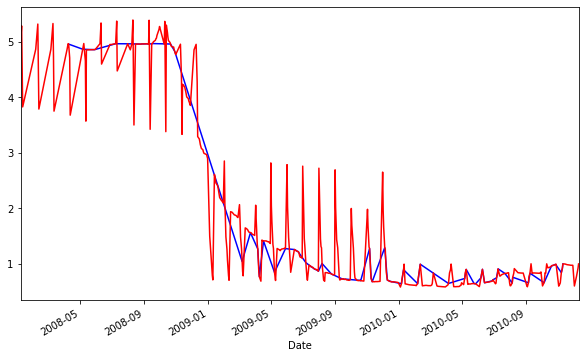

In [131]:
plt.figure(figsize=(10,6))
data2['euribor3m'].plot(color='blue')
euribor['3M'].plot(color='red')
plt.show()

In [80]:
data2.drop(columns='3M', inplace=True)

In [81]:
data2.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [132]:
data2.reset_index(inplace=True)

In [133]:
len(data2['Date'].unique())

78

In [134]:
data3 = data2.copy()

In [135]:
data2.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,3M
0,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.8575
1,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.8575
2,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.8575
3,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.8575
4,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.8575


In [136]:
data2.Date.isna().sum()

21021

In [137]:
data3['Date'] = data3['Date'].ffill()

In [138]:
data3['Date'].isna().sum()

0

In [139]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
Date              41188 non-null datetime64[ns]
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y   

In [142]:
xp = data3.loc[data3['day_week']=='Saturday']

In [149]:
xp['Date'].unique()

array(['2010-01-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [144]:
xy = xp = data3.loc[data3['day_week']=='Sunday']

In [146]:
xy['Date'].unique()

array(['2010-01-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [141]:
data3['day_week'] = data3['Date'].dt.weekday_name

In [94]:
data3['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [97]:
data3[['day_week','day_of_week']]

,day_week,day_of_week
0,Thursday,mon
1,Thursday,mon
2,Thursday,mon
3,Thursday,mon
4,Thursday,mon
...,...,...
41183,Saturday,fri
41184,Saturday,fri
41185,Saturday,fri
41186,Saturday,fri


In [ ]:
data3['']

In [47]:
data3['Date'][1]

Timestamp('2008-05-29 00:00:00')

In [48]:
data3['Date'][1] - timedelta(1)

Timestamp('2008-05-28 00:00:00')

In [150]:
data3.loc[(data3['day_week'] =='Saturday'),'Date'] = data3['Date'] - timedelta(1)
data3.loc[(data3['day_week'] =='Sunday'),'Date'] = data3['Date'] - timedelta(2)

In [151]:
data3['day_week'] = data3['Date'].dt.weekday_name

In [152]:
data3['day_week'].unique()

array(['Thursday', 'Wednesday', 'Monday', 'Friday', 'Tuesday'],
      dtype=object)

In [155]:
data3.drop(['3M','day_week'], axis=1, inplace=True)

In [157]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
Date              41188 non-null datetime64[ns]
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y   

In [156]:
additional_data = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone_project/dsc-capstone-submission-checklist/Portugal_Eurozone_data.csv')

In [159]:
headers = additional_data.iloc[0]
additional_data  = pd.DataFrame(additional_data.values[1:], columns=headers)

In [162]:
additional_data['Date'] = pd.to_datetime(additional_data['Date'])

In [163]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
Date                               783 non-null datetime64[ns]
MOM Inflation                      783 non-null object
Wage Growth                        783 non-null object
EURUSD                             783 non-null object
euro zoneGDP Growth Rate           783 non-null object
Portugal Income Tax annual rate    783 non-null object
Portugal Bank Lending Rate         783 non-null object
Portugal Personal Savings          783 non-null object
Portugal Wages                     783 non-null object
Portugal Unemployment Rate         783 non-null object
Portugal Sales Tax                 783 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 67.4+ KB


In [190]:
data_final= pd.merge(data3,additional_data, on='Date', how='left')

In [191]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 33 columns):
Date                               41188 non-null datetime64[ns]
index                              41188 non-null int64
age                                41188 non-null int64
job                                41188 non-null object
marital                            41188 non-null object
education                          41188 non-null object
default                            41188 non-null object
housing                            41188 non-null object
loan                               41188 non-null object
contact                            41188 non-null object
month                              41188 non-null object
day_of_week                        41188 non-null object
duration                           41188 non-null int64
campaign                           41188 non-null int64
pdays                              41188 non-null int64
previous                         

In [192]:
data_final.isna().sum()

Date                               0
index                              0
age                                0
job                                0
marital                            0
education                          0
default                            0
housing                            0
loan                               0
contact                            0
month                              0
day_of_week                        0
duration                           0
campaign                           0
pdays                              0
previous                           0
poutcome                           0
emp.var.rate                       0
cons.price.idx                     0
cons.conf.idx                      0
euribor3m                          0
nr.employed                        0
y                                  0
MOM Inflation                      0
Wage Growth                        0
EURUSD                             0
euro zoneGDP Growth Rate           0
P

In [193]:
data_final['Date'] = pd.to_datetime(data_final['Date'])

In [194]:
data_final.set_index('Date', inplace=True)

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
data_final_list = list(data_final.columns)

In [187]:
data_list = data_final_list[-10:]

In [197]:
data_final[data_list] = data_final[data_list].astype(float)

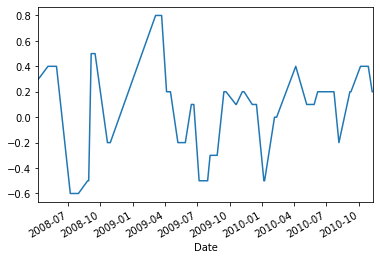

In [201]:
data_final['MOM Inflation'].plot()

In [203]:
data_final.to_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone_project/dsc-capstone-submission-checklist/data_final.csv')